# Exploratory Analysis of European Soccer Leagues
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be looking at football (soccer in the US) data collected from various European leagues from 2008 to 2016. The original source of this data can be found on [Kaggle](https://www.kaggle.com/hugomathien/soccer). However, I have only take relevant match information from the database via a DB Browser. Here is a data dictionary for the data pulled from the database:

- `match_id`: id for match from original source
- `country`: country of the match
- `league`: league the match is a part of
- `season`: particular season the match took place in
- `match_date`: date match took place
- `home_team_id`: id of home team from original source
- `home_team_name`: full name of home team
- `home_team_short_name`: short name of home team
- `home_goal`: number of goals scored by the home team
- `away_goal`: number of goals scored by the away team
- `away_team_id`: id of away team from original source
- `away_team_name`: full name of away team
- `away_team_short_name`: short name of away team

The purpose of this analysis is to compare how the different european leagues compare with respect to the amount of goals scored per match. The questions we will look to answer include:
- Which league scored the most goals per game? 
- Has the proportion of scoreless draws changed over the given time period?

Let's start by importing the relevant packages and data.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read in dataset
df = pd.read_csv('../data/match-data.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Let's get a feel for the data and see if there are any missing values or issues with data types

In [2]:
# take a sample of rows from the data for quick visual inspection
df.sample(10)

,match_id,country,league,season,match_date,home_team_id,home_team_name,home_team_short_name,home_goal,away_goal,away_team_id,away_team_name,away_team_short_name
16199,673826,Poland,Poland Ekstraklasa,2009/2010,2009-10-03 00:00:00,8242,Odra Wodzisław,ODR,1,3,1601,Ruch Chorzów,CHO
7403,1709762,France,France Ligue 1,2014/2015,2014-09-24 00:00:00,10249,Montpellier Hérault SC,MON,0,1,9829,AS Monaco,MON
10811,705195,Italy,Italy Serie A,2009/2010,2010-02-21 00:00:00,9976,Bari,BAR,0,2,8564,Milan,ACM
1318,1717951,Belgium,Belgium Jupiler League,2014/2015,2014-11-29 00:00:00,8475,Waasland-Beveren,WAA,2,1,274581,Royal Excel Mouscron,MOP
19684,2015881,Portugal,Portugal Liga ZON Sagres,2015/2016,2015-11-01 00:00:00,10215,Académica de Coimbra,ACA,1,1,8348,Moreirense FC,MOR
4061,1724115,England,England Premier League,2014/2015,2014-12-02 00:00:00,10260,Manchester United,MUN,2,1,10194,Stoke City,STK
11773,1287066,Italy,Italy Serie A,2012/2013,2012-10-31 00:00:00,8600,Udinese,UDI,2,2,8530,Catania,CAT
17919,686296,Portugal,Portugal Liga ZON Sagres,2009/2010,2009-12-13 00:00:00,10212,CS Marítimo,MAR,0,1,7841,Rio Ave FC,RA
670,838819,Belgium,Belgium Jupiler League,2010/2011,2011-02-19 00:00:00,9987,KRC Genk,GEN,1,0,8203,KV Mechelen,MEC
22246,684674,Spain,Spain LIGA BBVA,2009/2010,2009-10-03 00:00:00,8634,FC Barcelona,BAR,1,0,9865,UD Almería,ALM


In [3]:
# take a look at data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_id              25979 non-null  int64 
 1   country               25979 non-null  object
 2   league                25979 non-null  object
 3   season                25979 non-null  object
 4   match_date            25979 non-null  object
 5   home_team_id          25979 non-null  int64 
 6   home_team_name        25979 non-null  object
 7   home_team_short_name  25979 non-null  object
 8   home_goal             25979 non-null  int64 
 9   away_goal             25979 non-null  int64 
 10  away_team_id          25979 non-null  int64 
 11  away_team_name        25979 non-null  object
 12  away_team_short_name  25979 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.6+ MB


Wow, this dataset looks pretty clean and there didn't seem to be any suspect data in the sample of the data. The only issue with data type is that `match_date` should be changed to a datetime. In addition, in order to answer our questions, new columns will need to be added.

Let's investigate the `country`, `league` and `season` columns to see if their values make sense.

In [4]:
# find unique countries in data
for i, country in enumerate(df['country'].unique()):
    print(i + 1," ", country)

1   Belgium
2   England
3   France
4   Germany
5   Italy
6   Netherlands
7   Poland
8   Portugal
9   Scotland
10   Spain
11   Switzerland


In [5]:
# find unique leagues in data
for i, league in enumerate(df['league'].unique()):
    print(i + 1, " ", league)

1   Belgium Jupiler League
2   England Premier League
3   France Ligue 1
4   Germany 1. Bundesliga
5   Italy Serie A
6   Netherlands Eredivisie
7   Poland Ekstraklasa
8   Portugal Liga ZON Sagres
9   Scotland Premier League
10   Spain LIGA BBVA
11   Switzerland Super League


In [6]:
# find unique seasons in data
for i, season in enumerate(df['season'].unique()):
    print(i + 1, " ", season)

1   2008/2009
2   2009/2010
3   2010/2011
4   2011/2012
5   2012/2013
6   2013/2014
7   2014/2015
8   2015/2016


All the values in the columns look good. We have 11 countries to go along with 11 leagues and our matches span the correct time period.

Now, let's take a look at the numeric columns `home_goal` and `away_goal` to see if there are any issues with data quality.

In [7]:
# print summary statistics for home and away goals scored
df[['home_goal', 'away_goal']].describe()

,home_goal,away_goal
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


The maximum values of each column are really high, let's investigate those matches to see if the values are legitimite.

In [8]:
# find rows where home goals scored is equal to 
# the max home goals scored
df[df['home_goal'] == df['home_goal'].max()]

,match_id,country,league,season,match_date,home_team_id,home_team_name,home_team_short_name,home_goal,away_goal,away_team_id,away_team_name,away_team_short_name
13898,836306,Netherlands,Netherlands Eredivisie,2010/2011,2010-10-24 00:00:00,8640,PSV,PSV,10,0,10235,Feyenoord,FEY
24247,2030233,Spain,Spain LIGA BBVA,2015/2016,2015-12-20 00:00:00,8633,Real Madrid CF,REA,10,2,8370,Rayo Vallecano,RAY


These results can be verified in the wikipedia articles for the [2010-11 Eredivisie season](https://en.wikipedia.org/wiki/2010%E2%80%9311_Eredivisie#Results) and the [2015-16 La Liga season](https://en.wikipedia.org/wiki/2015%E2%80%9316_La_Liga#Results).

Just to be sure, let's take a look at the rows that contain the maximum value of the `away_goal` column.

In [9]:
# find rows where away goals scored is equal to
# the max away goals scored
df[df['away_goal'] == df['away_goal'].max()]

,match_id,country,league,season,match_date,home_team_id,home_team_name,home_team_short_name,home_goal,away_goal,away_team_id,away_team_name,away_team_short_name
7660,1990022,France,France Ligue 1,2015/2016,2016-03-13 00:00:00,10242,ES Troyes AC,TRO,0,9,9847,Paris Saint-Germain,PSG


Again, this result can be verified in the wikipedia article for the [2015-16 Ligue 1 season](https://en.wikipedia.org/wiki/2015%E2%80%9316_Ligue_1#Results).

The quality of this data is pristine, let's move on to cleaning the data. 

### Data Cleaning

In this step, we will:
- change `match_date` to a datetime
- add the following columns:
    - `result`:
        - `home` if home team won
        - `away` if away team won
        - `draw` if the match was a draw
    - `home_goal_difference`: home_goals - away_goals
    - `away_goal_difference`: away_goals - home_goals
    - `total_goals`: home_goals + away_goals
    - `scoreless_draw`: boolean indicating if the match ended 0-0
    
We will first change the data type of the `match_date` column.

In [10]:
# change match_date to a datetime object
df['match_date'] = pd.to_datetime(df['match_date'])

# verify the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   match_id              25979 non-null  int64         
 1   country               25979 non-null  object        
 2   league                25979 non-null  object        
 3   season                25979 non-null  object        
 4   match_date            25979 non-null  datetime64[ns]
 5   home_team_id          25979 non-null  int64         
 6   home_team_name        25979 non-null  object        
 7   home_team_short_name  25979 non-null  object        
 8   home_goal             25979 non-null  int64         
 9   away_goal             25979 non-null  int64         
 10  away_team_id          25979 non-null  int64         
 11  away_team_name        25979 non-null  object        
 12  away_team_short_name  25979 non-null  object        
dtypes: datetime64[ns

Now, let's add some columns that will be used for analysis later.

In [11]:
# add result column
df['result'] = np.nan
df.loc[df['home_goal'] > df['away_goal'], 'result'] = 'home'
df.loc[df['home_goal'] < df['away_goal'], 'result'] = 'away'
df.loc[df['home_goal'] == df['away_goal'], 'result'] = 'draw'

In [12]:
# add home_goal_difference
df['home_goal_difference'] = df['home_goal'] - df['away_goal']

In [13]:
# add away_goal_difference
df['away_goal_difference'] = df['away_goal'] - df['home_goal']

In [14]:
# add total_goals column
df['total_goals'] = df['home_goal'] + df['away_goal']

In [15]:
# add scoreless_draw column
df['scoreless_draw'] = df['total_goals'] == 0

In [16]:
df.head()

,match_id,country,league,season,match_date,home_team_id,home_team_name,home_team_short_name,home_goal,away_goal,away_team_id,away_team_name,away_team_short_name,result,home_goal_difference,away_goal_difference,total_goals,scoreless_draw
0,492473,Belgium,Belgium Jupiler League,2008/2009,2008-08-17,9987,KRC Genk,GEN,1,1,9993,Beerschot AC,BAC,draw,0,0,2,False
1,492474,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,10000,SV Zulte-Waregem,ZUL,0,0,9994,Sporting Lokeren,LOK,draw,0,0,0,True
2,492475,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,9984,KSV Cercle Brugge,CEB,0,3,8635,RSC Anderlecht,AND,away,-3,3,3,False
3,492476,Belgium,Belgium Jupiler League,2008/2009,2008-08-17,9991,KAA Gent,GEN,5,0,9998,RAEC Mons,MON,home,5,-5,5,False
4,492477,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,7947,FCV Dender EH,DEN,1,3,9985,Standard de Liège,STL,away,-2,2,4,False


Our data is now clean and has some extra features we can use in our analysis. Let's get started.

<a id='eda'></a>
## Exploratory Data Analysis

### Which league scored the most goals per game? 

In order to answer this question, we need to group by `league` and calculate the average total goals per match.

In [17]:
# group data by league and compute average total goals per match
# sort in descending order so top league is first in the list
gpm_league = df.groupby('league')['total_goals'].mean()\
             .sort_values(ascending=False)
gpm_league

league
Netherlands Eredivisie      3.080882
Switzerland Super League    2.929677
Germany 1. Bundesliga       2.901552
Belgium Jupiler League      2.801505
Spain LIGA BBVA             2.767105
England Premier League      2.710526
Scotland Premier League     2.633772
Italy Serie A               2.616838
Portugal Liga ZON Sagres    2.534600
France Ligue 1              2.443092
Poland Ekstraklasa          2.425000
Name: total_goals, dtype: float64

Wow, looks like the *Eredivisie* is the league we should all be watching! Between 2008 and 2016 the league averaged **over 3 goals per match**. Let's create a graphic so the results are easier to interpret.

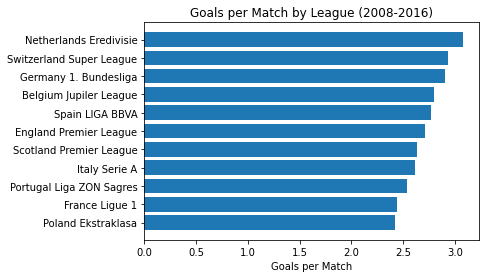

In [18]:
# sort values so the league with the best gpm average is on top
gpm_league = gpm_league.sort_values()

# plot bar chart
plt.barh(gpm_league.index, gpm_league);
plt.title("Goals per Match by League (2008-2016)");
plt.xlabel("Goals per Match");

### Has the proportion of scoreless draws been increasing?

One of the common complaints about football is that many matches are boring and end in scoreless draws. Although it is inevitable that some matches will end 0-0, what proportion actually do? Let's look at the overall percentage and then see how that has changed between 2008 and 2016.

In [19]:
# Compute overall proportion of scoreless draws
print("Overall proportion of scoreless draws: {0:.2f}%"\
      .format(100 * df['scoreless_draw'].mean()))

Overall proportion of scoreless draws: 7.61%


Alright, so it looks like about 7% of matches in the main European leagues end in scoreless draws. That means a large majority of matches do see at least one goal! I suppose it all depends on which match(es) you choose to watch on any given weekend.

Now, let's see if the proportion has changed at all over the time period of 2008 to 2016.

In [20]:
# group by season and compute proportion of scoreless draws
# by season
scoreless_draws_by_season = df.groupby('season')['scoreless_draw'].mean()
scoreless_draws_by_season

season
2008/2009    0.076969
2009/2010    0.082043
2010/2011    0.076380
2011/2012    0.084472
2012/2013    0.074540
2013/2014    0.067282
2014/2015    0.076391
2015/2016    0.070655
Name: scoreless_draw, dtype: float64

Alright, this is a lot of numbers, let's see if we can see a trend better in a line plot.

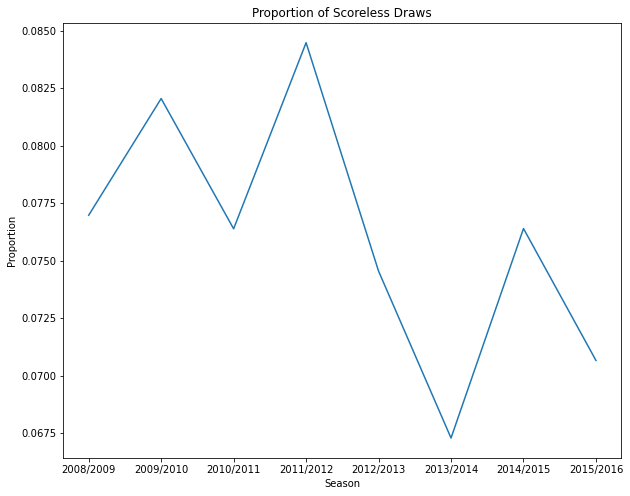

In [21]:
# plot data on a line plot
scoreless_draws_by_season.plot(figsize=(10,8));
plt.title("Proportion of Scoreless Draws");
plt.xlabel("Season");
plt.ylabel("Proportion");

Although this is only a small number of seasons, it looks like the the proportion is smaller in the latest season when compared to the earliest season in the data. However, **the absolute difference is not very large**, (only about 0.006!). Thus these fluctuations in the proportion of scoreless draws could just be due to random chance and it is most likely the case that the true proportion of scoreless draws has not really dropped. Later, we should test this hypothesis.

<a id='conclusions'></a>
## Conclusions

Before we go into what conclusions we were able to draw from this data, let's go over some limitations of it. The data was limited to leagues in Europe, thus any questions we had to pertain only to that region. That is, although the data was sufficient to answer our questions, our answers only pertain to the domain of the European leagues. We should be careful about extrapolating any findings to other leagues around the world. The other limitation to this data is of data quality. Since we did not collect the data ourselves, we are unable to truly determine its quality. Verifying each match score would be impossible, so we have to be satisfied with the quality of the data given.

In this workbook, we explored answered a couple of questions concerning the different football leagues across Europe. We discovered that the *Eredivisie* was the highest scoring league, on average, in Europe betweem the 2008/2009 and 2015/2016 seasons. In addition, we saw that the most recent proportion of scoreless draws across Europe was smaller than it was in th 2008/2009 season.

Again, we should be careful in extrapolating these findings. For instance, we do not not for sure that the *Eredivisie* is still in fact the highest scoring league in Europe. We can only state that it had the highest goals per match average between 2008 and 2016. Also, although the proportion of scoreless draws has seen a slight decrease since 2008, we cannot definitively say that the true proportion has decreased. These claims needed to handled with more significant statistical tests, which will be done in later notebooks.

As always, the work in this notebook has raised even more questions:
- Is the true proportion of scoreless draws really changing?
- What qualities are associated with a home win, away win or draw?
- Can the scoreline of a particular match be predicted with a certain accuracy?

We need more data and a different toolkit to answer these questions, but they will be a subject of a different project.